In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np

df = pd.read_csv("heart_data.csv")


print(df.isnull().sum())

df.describe()

age                       0
gender                    0
chest_pain_type           0
resting_blood_pressure    0
cholesterol               0
fasting_blood_sugar       0
electrocardiographic      0
maximum_heart_rate        0
exercise_blood_status     0
depression                0
education                 0
ca                        0
thalassemia               0
aim                       0
dtype: int64


,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,electrocardiographic,maximum_heart_rate,exercise_blood_status,depression,education,ca,thalassemia,aim
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [2]:
df.corr()['aim'].sort_values()

exercise_blood_status    -0.436757
depression               -0.430696
ca                       -0.391724
thalassemia              -0.344029
gender                   -0.280937
age                      -0.225439
resting_blood_pressure   -0.144931
cholesterol              -0.085239
fasting_blood_sugar      -0.028046
electrocardiographic      0.137230
education                 0.345877
maximum_heart_rate        0.421741
chest_pain_type           0.433798
aim                       1.000000
Name: aim, dtype: float64

<AxesSubplot:xlabel='aim', ylabel='count'>

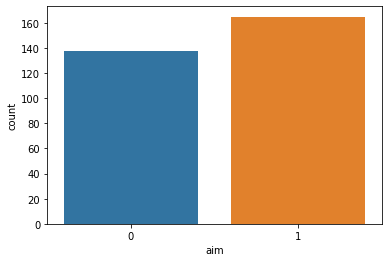

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="aim", data = df)

In [4]:
#MODELİ EGİTİM VE TEST VERİSİ OLARAK AYIRDIK

import tensorflow as tf
from sklearn.model_selection import train_test_split

y = df['aim'].values
x = df.drop("aim",axis=1).values

x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.33, random_state=3)

In [5]:
#MODELİ OLUSTURMA  SINIRLARI OLUŞTURMA

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

print(x_train.shape)  #13 sutun var egitim verisinde


#neural sayısını arttırabilriz aşagıdaki degerler here bir neural gösterir nöron
model.add(Dense(13,activation="relu"))
model.add(Dense(13,activation="relu"))
model.add(Dense(13,activation="relu"))
model.add(Dense(1,activation="sigmoid"))  # çıkış katmanı 1 tane çıkış istediğimiz için 1 yapıyoruz, fonksiyonu sigmoid yapıyoruz 0 - 1 arası deger isityoruz


(203, 13)


In [6]:
#COMPİLE AŞAMASI DERLEME AŞAMASI

model.compile(loss = "binary_crossentropy", optimizer="adam") #loss hataları gösteren kısım  optimizer="adam" katmanlar arası geçişi hızlandırır en iyi performansı adam gösteriyor.

In [7]:
model.fit(x=x_train, y = y_train, validation_data=(x_test,y_test), epochs=150,verbose=1) #epochs katmalar arası geçiş

Epoch 1/150
7/7 [==============================] - 12s 112ms/step - loss: 1.4799 - val_loss: 1.2675
Epoch 2/150
7/7 [==============================] - 0s 23ms/step - loss: 1.1702 - val_loss: 1.1590
Epoch 3/150
7/7 [==============================] - 0s 24ms/step - loss: 1.1205 - val_loss: 1.1330
Epoch 4/150
7/7 [==============================] - 0s 25ms/step - loss: 1.0842 - val_loss: 1.0433
Epoch 5/150
7/7 [==============================] - 0s 23ms/step - loss: 1.0249 - val_loss: 1.0087
Epoch 6/150
7/7 [==============================] - 0s 27ms/step - loss: 1.0058 - val_loss: 0.8989
Epoch 7/150
7/7 [==============================] - 0s 27ms/step - loss: 0.8829 - val_loss: 0.8278
Epoch 8/150
7/7 [==============================] - 0s 24ms/step - loss: 0.8366 - val_loss: 0.8001
Epoch 9/150
7/7 [==============================] - 0s 32ms/step - loss: 0.8126 - val_loss: 0.7222
Epoch 10/150
7/7 [==============================] - 0s 30ms/step - loss: 0.7657 - val_loss: 0.6748
Epoch 11/150
7/7 

<AxesSubplot:>

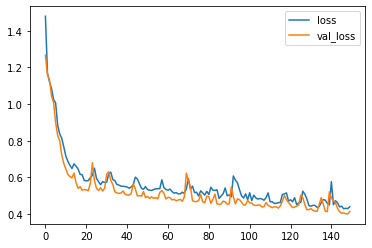

In [8]:
# MODEL KAYBI

modelkaybi = pd.DataFrame(model.history.history)

modelkaybi.plot()  # grafikdeki degerlerin birbirine yakın olması gerekir o yüzden epochs parametresisin arttıralım yada nueral sayısını arttırabiliriz

In [9]:
tahmin = (model.predict(x_test) > 0.5).astype("int32")
tahmin

4/4 [==============================] - 0s 6ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,tahmin))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        43
           1       0.76      0.95      0.84        57

    accuracy                           0.80       100
   macro avg       0.83      0.78      0.78       100
weighted avg       0.82      0.80      0.79       100

